In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from connectivity import figures
from connectivity import visualize as vis

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/maedbhking/.local/share/virtualenvs/cerebellum_connectivity-DbxULmID/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
/Users/maedbhking/Documents/SUITPy/SUITPy/__init__.py:65: FutureWarning: Fetchers from the SUITPy.atlas module will be updated in later versions as new atlases become available
  "updated in later versions as new atlases become available", FutureWarning)


In [25]:
# load train data

df_train = vis.train_summary(
            summary_name="train_summary",
            exps=['sc1']
            )

In [3]:
# load eval data

df_eval = vis.eval_summary(
          summary_name="eval_summary",
          exps=['sc2']
          )

In [4]:
# set plotting summary

vis.plotting_style()

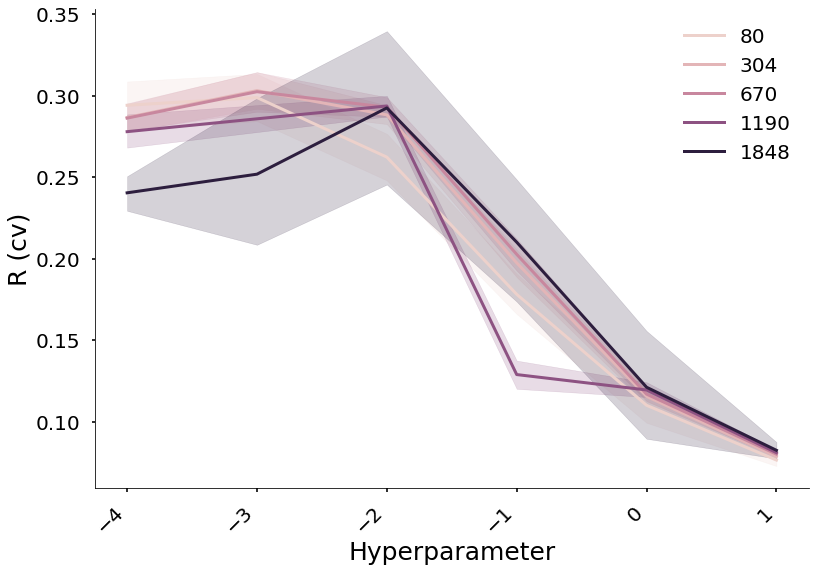

In [30]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train.query('train_hyperparameter>-5'),
                          x='train_hyperparameter',
                          hue='train_num_regions',
                          atlases=['tessels'],
                          best_models=False,
                          methods=['lasso']) # L2regression
plt.xlabel('Hyperparameter');

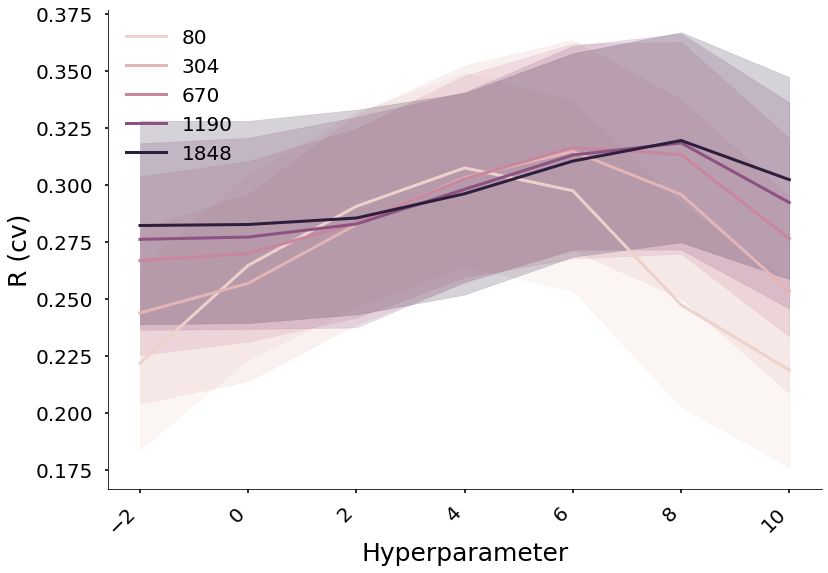

In [31]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train,
                          x='train_hyperparameter',
                          hue='train_num_regions',
                          best_models=False,
                          atlases=['tessels'],
                          methods=['ridge']) # L2regression
plt.xlabel('Hyperparameter');

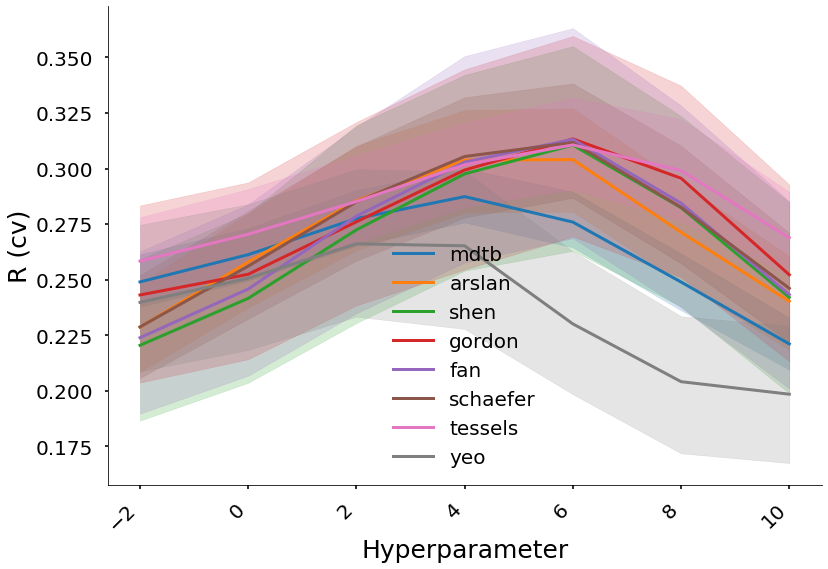

In [32]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train,
                          x='train_hyperparameter',
                          hue='train_atlas',
                          atlases=None,
                          best_models=False,
                          methods=['ridge']) # L2regression
plt.xlabel('Hyperparameter');

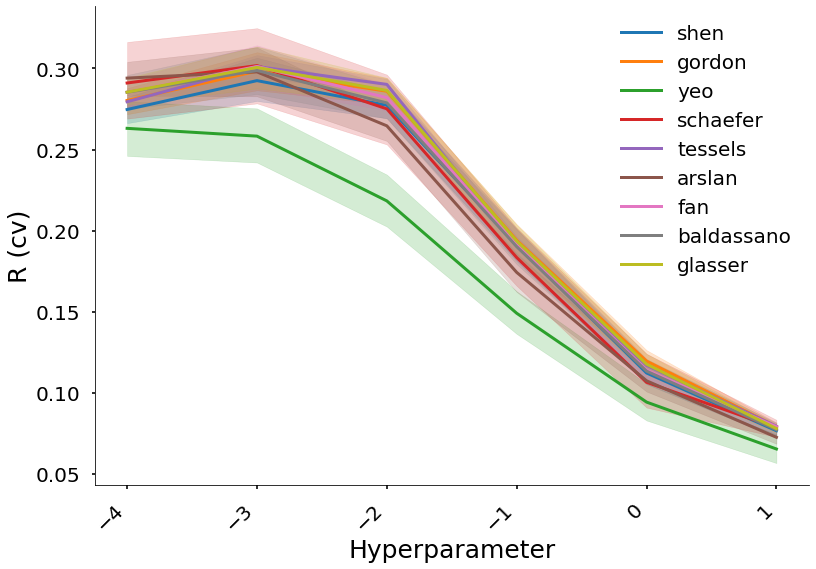

In [35]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train.query('train_hyperparameter>-5'),
                          x='train_hyperparameter',
                          hue='train_atlas',
                          best_models=False,
                          atlases=None,
                          methods=['lasso']) 
plt.xlabel('Hyperparameter');

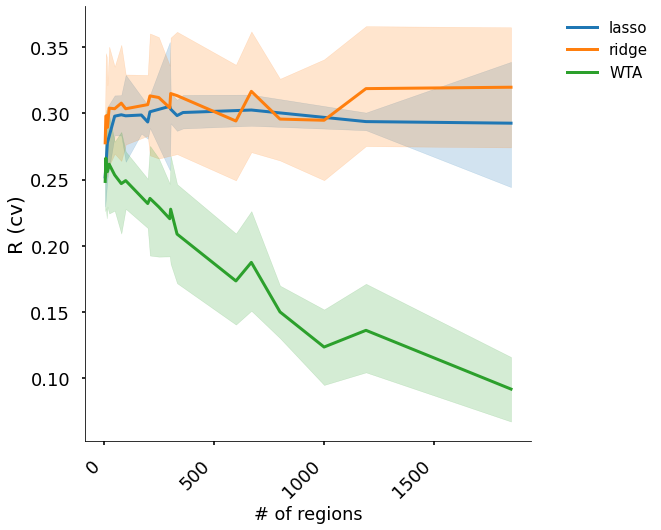

In [171]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train,
                          x='train_num_regions',
                          hue='train_model',
                          best_models=True,
                          methods=['WTA', 'ridge', 'lasso']) 
plt.xlabel('# of regions');

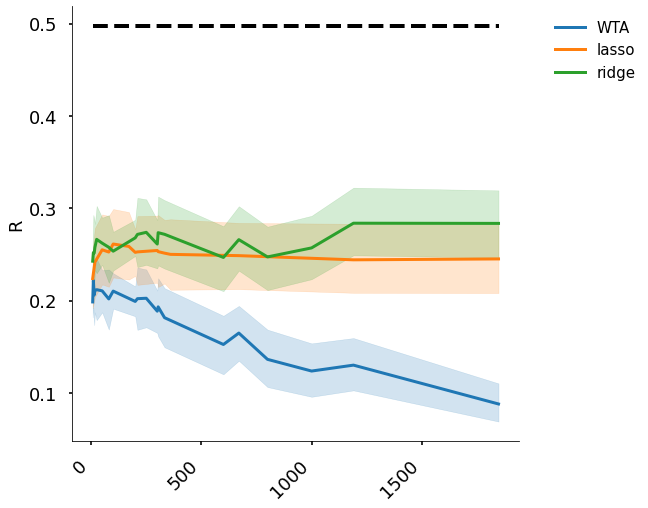

In [6]:
# EVAL predictions (R)

vis.plot_eval_predictions(dataframe=df_eval,
                        x='eval_num_regions', 
                        hue='eval_model', # 'eval_model' 
                        methods=['WTA', 'ridge', 'lasso'], # 'ridge', 'lasso'
                        )

best model for sc1 is ridge_tessels1002_alpha_8


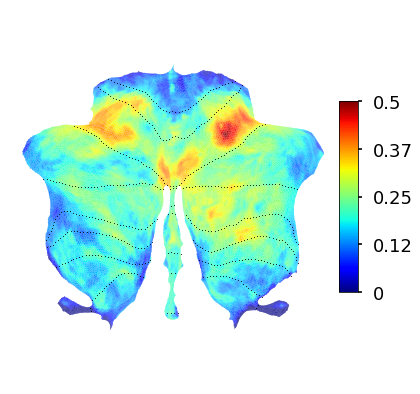

In [9]:
# plot eval map (R)

vis.map_eval(data="R", 
            exp="sc1", 
            model_name='best_model', 
            method='ridge',
            colorbar=True,
            title=False
            )

best model for sc1 is ridge_tessels1002_alpha_8


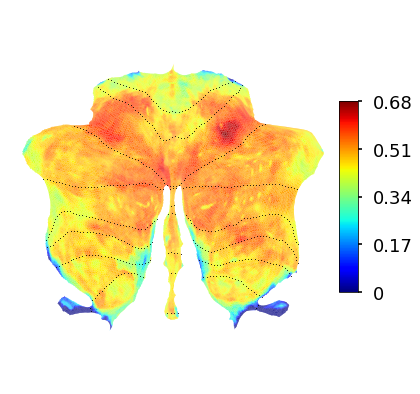

In [10]:
# plot noiseceiling (R)

vis.map_eval(data="noiseceiling_Y_R", 
            exp="sc1", 
            model_name='best_model', 
            method='ridge',
            colorbar=True,
            title=False
            )

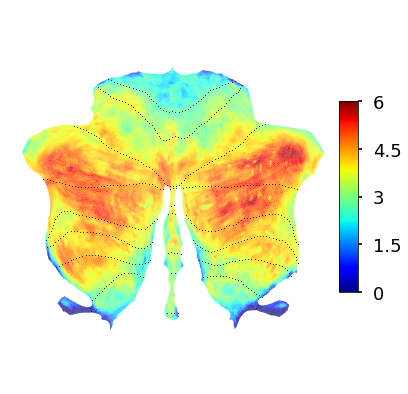

In [14]:
# plot lasso map

vis.map_lasso(model_name='lasso_tessels0042_alpha_-3', # lasso_tessels1002_alpha_-2
            exp="sc1", 
            stat='count', # percent
            colorbar=True)

In [40]:
# vis.plot_predictions_atlas(data='eval', 
#                             method='WTA')

AttributeError: module 'connectivity.visualize' has no attribute 'plot_predictions_atlas'

In [4]:
# sparsity

# get distances
df_distances = vis.plot_distances(
                exp='sc1',
                model_name='best_model',
                method='ridge')

best model for sc1 is ridge_tessels1002_alpha_8


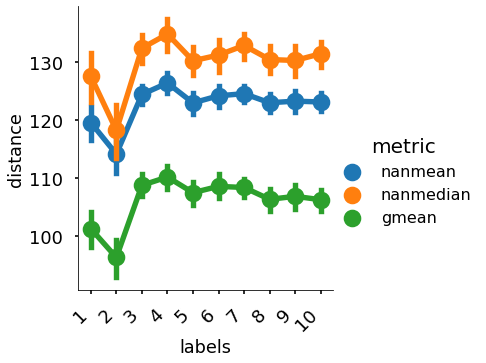

In [152]:
# plot distances (average across thresholds): break down by metric

sns.factorplot(x='labels', y='distance', hue='metric', data=df_distances.query('atlas=="MDTB10"'))
plt.xticks(rotation=45, ha='right')
plt.show()

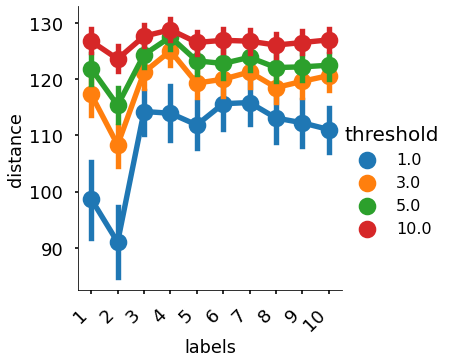

In [153]:
# plot distances (average across metric): break down by metric

sns.factorplot(x='labels', y='distance', hue='threshold', data=df_distances.query('atlas=="MDTB10"'))
plt.xticks(rotation=45, ha='right')
plt.show()

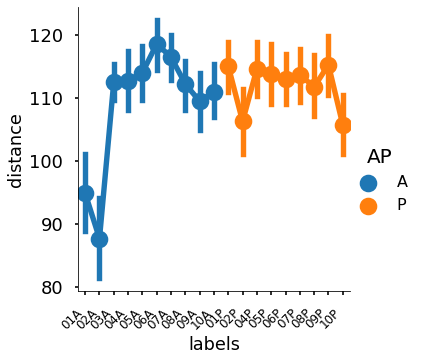

In [156]:
sns.factorplot(x='labels', y='distance', hue='subregion', data=df_distances.query('atlas=="MDTB10-subregions" and threshold==1'))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

In [5]:
vis.map_distances(model_name='ridge_tessels1002_alpha_8',
                atlas='MDTB10-subregions',
                threshold=100,
                column=11
                )